# Cleaning the merged data:

In this notebook, we explore the merged data and attempt to clean the data prior to modeling.

In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [322]:
df = pd.read_csv('merged_sales_pluto_data.csv', index_col=None)

In [323]:
pd.set_option('display.max_columns', 500)
df.head()

,ADDRESS,APARTMENT NUMBER,Address,AssessLand,AssessTot,BLOCK,BOROUGH,BUILDING CLASS AT PRESENT,BUILDING CLASS AT TIME OF SALE,BUILDING CLASS CATEGORY,BldgArea,Block,Borough,COMMERCIAL UNITS,CT2010,CondoNo,EASE-MENT,GROSS SQUARE FEET,LAND SQUARE FEET,LOT,Lot,LotArea,NEIGHBORHOOD,NumBldgs,NumFloors,Pluto_BBL,PolicePrct,RESIDENTIAL UNITS,ResArea,SALE DATE,SALE PRICE,SchoolDist,TAX CLASS AT PRESENT,TAX CLASS AT TIME OF SALE,TOTAL UNITS,YEAR BUILT,YearAlter1,YearAlter2,YearBuilt,ZIP CODE,ZipCode,unit_BBL
0,19-56 81ST STREET,,19-56 81 STREET,8164.0,28531.0,949,4,A5,A5,01 ONE FAMILY HOMES,1224.0,949.0,QN,0,317.00,0.0,,1224,1800,38,38.0,1800.0,AIRPORT LA GUARDIA,1.0,2.0,4.009490e+09,114.0,1,1224.0,2011-10-14,0,30.0,1,1,1,1945,0.0,0.0,1945.0,11370,11370.0,4.009490e+09
1,350 BEACH 40TH STREET,,350 BEACH 40 STREET,6008.0,16808.0,15829,4,A5,A5,01 ONE FAMILY HOMES,1502.0,15829.0,QN,0,992.00,0.0,,1502,2613,34,34.0,2613.0,ARVERNE,1.0,2.0,4.158290e+09,101.0,1,1502.0,2011-03-07,341360,27.0,1,1,1,2008,0.0,0.0,2008.0,11691,11691.0,4.158290e+09
2,317 BEACH 40 STREET,,317 BEACH 40 STREET,1793.0,3788.0,15830,4,A6,A6,01 ONE FAMILY HOMES,608.0,15830.0,QN,0,992.00,0.0,,608,2115,61,61.0,2115.0,ARVERNE,1.0,1.0,4.158300e+09,101.0,1,608.0,2011-03-03,50000,27.0,1,1,1,1920,0.0,0.0,1920.0,11691,11691.0,4.158300e+09
3,335 BEACH 45TH STREET,,335 BEACH 45 STREET,3978.0,9069.0,15837,4,A1,A1,01 ONE FAMILY HOMES,1048.0,15837.0,QN,0,972.04,0.0,,1048,2470,56,56.0,2470.0,ARVERNE,1.0,2.0,4.158370e+09,101.0,1,1048.0,2011-07-06,160000,27.0,1,1,1,1925,0.0,0.0,1925.0,11691,11691.0,4.158370e+09
4,3720 BEACH CHANNEL DRIVE,,37-20 BEACH CHANNEL DRIVE,2877.0,14246.0,15954,4,A5,A5,01 ONE FAMILY HOMES,1502.0,15954.0,QN,0,992.00,0.0,,1502,2080,87,87.0,2080.0,ARVERNE,1.0,2.0,4.159540e+09,101.0,1,1502.0,2011-01-28,434500,27.0,1,1,1,2008,0.0,0.0,2008.0,11691,11691.0,4.159540e+09


## Cleaning Sale Price

Our first approach to cleaning the data will be do drop the records where sale price is low (under the assumption this reflects a deed transfer, not a public sale at market price).

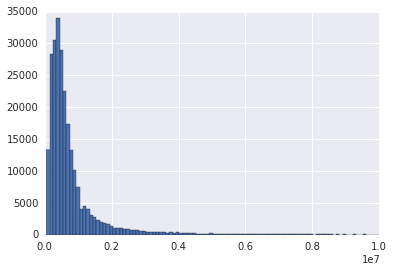

In [324]:
least_reasonable_sale_price = 50000

df = df.loc[df['SALE PRICE'] > least_reasonable_sale_price, :].reset_index(drop=True)
plt.hist(df.loc[df['SALE PRICE'] < 10000000, 'SALE PRICE'].values, bins=100)
plt.show()

In [325]:
df.shape

(255788, 42)

Now let's tackle zip code:

In [326]:
df[['ZIP CODE','ZipCode']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255788 entries, 0 to 255787
Data columns (total 2 columns):
ZIP CODE    255788 non-null int64
ZipCode     254909 non-null float64
dtypes: float64(1), int64(1)
memory usage: 3.9 MB


In [327]:
np.sum(df['ZIP CODE'] == df['ZipCode'])

251181

We drop records where these two fields disagree, since this indicates potential data entry or merge errors.

In [328]:
df = df.loc[~((df['ZIP CODE'] != df['ZipCode']) &
         (~df['ZIP CODE'].isnull()) &
         (~df['ZipCode'].isnull())),:]

In [329]:
df.shape

(252060, 42)

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252060 entries, 0 to 255787
Data columns (total 42 columns):
ADDRESS                           252060 non-null object
APARTMENT NUMBER                  252060 non-null object
Address                           251224 non-null object
AssessLand                        251225 non-null float64
AssessTot                         251225 non-null float64
BLOCK                             252060 non-null int64
BOROUGH                           252060 non-null int64
BUILDING CLASS AT PRESENT         252060 non-null object
BUILDING CLASS AT TIME OF SALE    252060 non-null object
BUILDING CLASS CATEGORY           252060 non-null object
BldgArea                          251225 non-null float64
Block                             251225 non-null float64
Borough                           251225 non-null object
COMMERCIAL UNITS                  252060 non-null int64
CT2010                            251200 non-null float64
CondoNo                         

Now note ZipCode is a duplicate feature, which we will drop (note we drop ZipCode since it has null entries where ZIP CODE does not):

In [331]:
df.drop('ZipCode', inplace=True, axis=1)
df.shape

(252060, 41)

Next we deal with YearBuilt, YearAlter1, and YearAlter2. We will construct the following features
- Building age: 2016-YearBuilt
- Number of times altered:
    - 0 if YearAlter1 and YearAlter2 missing,
    - 1 if YearAlter1 has a valid value and YearAlter2 missing
    - 2 if Both non-null
- Years since last altered:
    - 2016 - max(YearBuilt, YearAlter1, YearAlter2)


In [332]:
np.sum(df['YearBuilt'] == df['YEAR BUILT'])

226748

In [333]:
zero_years_replacements = np.max(df.loc[(df['YearBuilt'] == 0) |
                                        (df['YEAR BUILT'] == 0),
                                        ['YearBuilt','YEAR BUILT']], axis=1)

In [334]:
df.loc[(df['YEAR BUILT'] == 0), 'YEAR BUILT'] = zero_years_replacements
df.loc[(df['YEAR BUILT'] == 0), 'YEAR BUILT'] = zero_years_replacements
np.sum(df['YearBuilt'] == df['YEAR BUILT'])

242177

In [335]:
np.sum(df.loc[df['YEAR BUILT'] == 0,['YearBuilt', 'YEAR BUILT']], axis=0)

YearBuilt     0.0
YEAR BUILT    0.0
dtype: float64

In [336]:
df.loc[df['YEAR BUILT'] == 0,:].shape

(1478, 41)

We drop these 1478 records without known building age.

In [337]:
df = df.loc[~(df['YEAR BUILT'] == 0),:]
df.shape

(250582, 41)

In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250582 entries, 0 to 255787
Data columns (total 41 columns):
ADDRESS                           250582 non-null object
APARTMENT NUMBER                  250582 non-null object
Address                           249976 non-null object
AssessLand                        249977 non-null float64
AssessTot                         249977 non-null float64
BLOCK                             250582 non-null int64
BOROUGH                           250582 non-null int64
BUILDING CLASS AT PRESENT         250582 non-null object
BUILDING CLASS AT TIME OF SALE    250582 non-null object
BUILDING CLASS CATEGORY           250582 non-null object
BldgArea                          249977 non-null float64
Block                             249977 non-null float64
Borough                           249977 non-null object
COMMERCIAL UNITS                  250582 non-null int64
CT2010                            249974 non-null float64
CondoNo                         

In [339]:
np.sum(df['YearBuilt'] == df['YEAR BUILT'])

240929

Now the remaining mismatches between building years indicate likely data entry or merge problems- these records are dropped.

In [340]:
df = df.loc[df['YearBuilt'] == df['YEAR BUILT'],:]
df.drop('YearBuilt', axis=1, inplace=True)
df.shape

(240929, 40)

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240929 entries, 0 to 255787
Data columns (total 40 columns):
ADDRESS                           240929 non-null object
APARTMENT NUMBER                  240929 non-null object
Address                           240929 non-null object
AssessLand                        240929 non-null float64
AssessTot                         240929 non-null float64
BLOCK                             240929 non-null int64
BOROUGH                           240929 non-null int64
BUILDING CLASS AT PRESENT         240929 non-null object
BUILDING CLASS AT TIME OF SALE    240929 non-null object
BUILDING CLASS CATEGORY           240929 non-null object
BldgArea                          240929 non-null float64
Block                             240929 non-null float64
Borough                           240929 non-null object
COMMERCIAL UNITS                  240929 non-null int64
CT2010                            240928 non-null float64
CondoNo                         

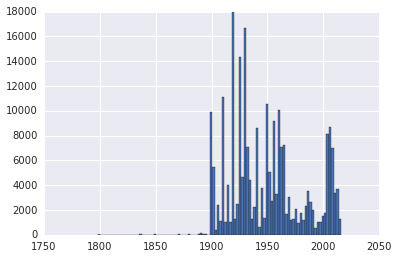

In [342]:
plt.hist(df['YEAR BUILT'], bins=100)
plt.show()

In [343]:
df['BuildingAge'] = 2016 - df['YEAR BUILT']

Now let's deal with YearAlter1 and YearAlter2

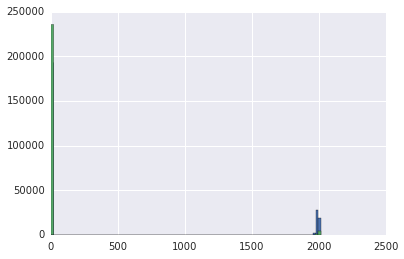

In [344]:
plt.hist(df['YearAlter1'], bins=100)
plt.hist(df['YearAlter2'], bins=100)
plt.show()

In [345]:
df['NumRecordedAltered'] = (df['YearAlter1'] != 0).map({True:1, False:0})+ (df['YearAlter2'] != 0).map({True:1, False:0})
df['NumRecordedAltered'].value_counts()

0    192595
1     42976
2      5358
Name: NumRecordedAltered, dtype: int64

In [346]:
df['YearsSinceLastRecordedAlter'] = 2016 - np.max(df[['YearAlter1','YearAlter2','YEAR BUILT']], axis=1)

In [347]:
df['YearsSinceLastRecordedAlter'].value_counts()

96.0     13963
86.0     11643
91.0     10050
66.0      7825
106.0     7430
9.0       6538
56.0      6349
76.0      6135
11.0      5597
28.0      5588
8.0       5567
29.0      5490
10.0      5329
61.0      4981
30.0      4803
117.0     4668
85.0      4553
115.0     4358
31.0      3955
51.0      3868
81.0      3858
27.0      3752
7.0       3608
4.0       3504
3.0       3464
5.0       3283
12.0      3247
71.0      3082
53.0      3064
101.0     2775
         ...  
130.0        3
122.0        3
124.0        3
125.0        3
176.0        3
181.0        2
127.0        2
174.0        2
164.0        2
192.0        2
170.0        2
178.0        1
182.0        1
175.0        1
173.0        1
171.0        1
184.0        1
212.0        1
169.0        1
165.0        1
161.0        1
159.0        1
158.0        1
151.0        1
149.0        1
147.0        1
144.0        1
141.0        1
139.0        1
160.0        1
Name: YearsSinceLastRecordedAlter, dtype: int64

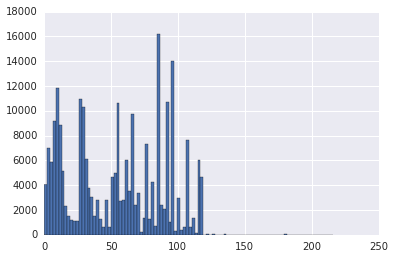

In [348]:
plt.hist(df['YearsSinceLastRecordedAlter'], bins=100)
plt.show()

In [349]:
df.drop(['YEAR BUILT','YearAlter1','YearAlter2'], axis=1, inplace=True)
df.shape

(240929, 40)

We proceed up through the columns- before proceeding, lets look at the df summary:

In [350]:
df.describe()

,AssessLand,AssessTot,BLOCK,BOROUGH,BldgArea,Block,COMMERCIAL UNITS,CT2010,CondoNo,GROSS SQUARE FEET,LAND SQUARE FEET,LOT,Lot,LotArea,NumBldgs,NumFloors,Pluto_BBL,PolicePrct,RESIDENTIAL UNITS,ResArea,SALE PRICE,SchoolDist,TAX CLASS AT TIME OF SALE,TOTAL UNITS,ZIP CODE,unit_BBL,BuildingAge,NumRecordedAltered,YearsSinceLastRecordedAlter
count,2.409290e+05,2.409290e+05,240929.000000,240929.000000,2.409290e+05,240929.000000,240929.000000,240928.000000,240929.000000,2.409290e+05,2.409290e+05,240929.000000,240929.000000,2.409290e+05,240929.000000,240929.000000,2.409290e+05,240892.00000,240929.000000,2.409290e+05,2.409290e+05,240892.000000,240929.000000,240929.000000,240929.000000,2.409290e+05,240929.000000,240929.000000,240929.000000
mean,1.655677e+06,8.703053e+06,3902.578577,2.805901,1.358922e+05,3902.578577,0.047566,379.905192,317.764043,1.953861e+03,1.608076e+03,358.934072,1801.067983,4.193883e+04,3.431936,8.086939,2.844929e+09,69.38406,2.086395,1.019404e+05,1.070041e+06,16.712830,1.561593,2.133487,10798.558945,2.844927e+09,66.865944,0.222854,54.917100
std,6.307119e+06,2.262517e+07,3487.184643,1.342560,1.050763e+06,3487.184643,0.382845,365.578614,741.343819,2.821455e+04,9.080911e+03,660.781871,3155.279431,2.442405e+05,14.461716,9.973861,1.359796e+09,39.54763,32.259670,2.470685e+05,1.152039e+07,10.776885,0.496193,32.397372,589.709609,1.359797e+09,33.264791,0.466550,35.149178
min,0.000000e+00,0.000000e+00,1.000000,1.000000,0.000000e+00,1.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000,1.000078e+09,1.00000,0.000000,0.000000e+00,5.000100e+04,1.000000,1.000000,0.000000,0.000000,1.000071e+09,0.000000,0.000000,0.000000
25%,9.652000e+03,2.794500e+04,1215.000000,1.000000,2.025000e+03,1215.000000,0.000000,NaN,0.000000,0.000000e+00,0.000000e+00,20.000000,20.000000,2.500000e+03,1.000000,2.000000,1.016008e+09,NaN,0.000000,1.928000e+03,3.200000e+05,NaN,1.000000,0.000000,10065.000000,1.016001e+09,48.000000,0.000000,26.000000
50%,7.547100e+04,5.548930e+05,2451.000000,3.000000,1.095100e+04,2451.000000,0.000000,NaN,0.000000,0.000000e+00,0.000000e+00,47.000000,47.000000,5.021000e+03,1.000000,4.000000,3.046560e+09,NaN,1.000000,9.700000e+03,5.150000e+05,NaN,2.000000,1.000000,11206.000000,3.046560e+09,71.000000,0.000000,56.000000
75%,1.064268e+06,7.049257e+06,5906.000000,4.000000,1.210720e+05,5906.000000,0.000000,NaN,0.000000,1.998000e+03,2.500000e+03,353.000000,356.000000,1.998200e+04,1.000000,9.000000,4.050230e+09,NaN,2.000000,1.146000e+05,8.640000e+05,NaN,2.000000,2.000000,11356.000000,4.050230e+09,91.000000,0.000000,86.000000
max,1.345064e+08,9.069332e+08,16322.000000,5.000000,4.954783e+07,16322.000000,46.000000,1621.000000,9566.000000,8.942176e+06,2.675000e+06,9112.000000,9008.000000,4.231466e+06,417.000000,119.000000,5.080500e+09,123.00000,8759.000000,8.367942e+06,4.111112e+09,32.000000,2.000000,8805.000000,11694.000000,5.080500e+09,218.000000,2.000000,216.000000


First thing I notice is zip code = 0. This indicates a misentered value:

In [351]:
df.loc[df['ZIP CODE']==0,:].shape

(2, 40)

It looks like this only occurs twice- let's drop those rows.

In [352]:
df = df.loc[~(df['ZIP CODE']==0),:]
df.shape

(240927, 40)

Let's continue this cleaning:

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240927 entries, 0 to 255787
Data columns (total 40 columns):
ADDRESS                           240927 non-null object
APARTMENT NUMBER                  240927 non-null object
Address                           240927 non-null object
AssessLand                        240927 non-null float64
AssessTot                         240927 non-null float64
BLOCK                             240927 non-null int64
BOROUGH                           240927 non-null int64
BUILDING CLASS AT PRESENT         240927 non-null object
BUILDING CLASS AT TIME OF SALE    240927 non-null object
BUILDING CLASS CATEGORY           240927 non-null object
BldgArea                          240927 non-null float64
Block                             240927 non-null float64
Borough                           240927 non-null object
COMMERCIAL UNITS                  240927 non-null int64
CT2010                            240926 non-null float64
CondoNo                         

Note at this point there are only 38 records with missing values, out of 241k records- these records are dropped since they represent a trivial subset of the data.

In [354]:
df = df.dropna(axis=0, how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240889 entries, 0 to 255787
Data columns (total 40 columns):
ADDRESS                           240889 non-null object
APARTMENT NUMBER                  240889 non-null object
Address                           240889 non-null object
AssessLand                        240889 non-null float64
AssessTot                         240889 non-null float64
BLOCK                             240889 non-null int64
BOROUGH                           240889 non-null int64
BUILDING CLASS AT PRESENT         240889 non-null object
BUILDING CLASS AT TIME OF SALE    240889 non-null object
BUILDING CLASS CATEGORY           240889 non-null object
BldgArea                          240889 non-null float64
Block                             240889 non-null float64
Borough                           240889 non-null object
COMMERCIAL UNITS                  240889 non-null int64
CT2010                            240889 non-null float64
CondoNo                         

Next, we drop the feature "EASEMENT" and 'CondoNo':

In [355]:
df.drop(['EASE-MENT','CondoNo'], axis=1, inplace=True)

In [356]:
df.describe()

,AssessLand,AssessTot,BLOCK,BOROUGH,BldgArea,Block,COMMERCIAL UNITS,CT2010,GROSS SQUARE FEET,LAND SQUARE FEET,LOT,Lot,LotArea,NumBldgs,NumFloors,Pluto_BBL,PolicePrct,RESIDENTIAL UNITS,ResArea,SALE PRICE,SchoolDist,TAX CLASS AT TIME OF SALE,TOTAL UNITS,ZIP CODE,unit_BBL,BuildingAge,NumRecordedAltered,YearsSinceLastRecordedAlter
count,2.408890e+05,2.408890e+05,240889.000000,240889.000000,2.408890e+05,240889.000000,240889.000000,240889.000000,2.408890e+05,2.408890e+05,240889.000000,240889.000000,2.408890e+05,240889.000000,240889.000000,2.408890e+05,240889.000000,240889.000000,2.408890e+05,2.408890e+05,240889.000000,240889.000000,240889.000000,240889.000000,2.408890e+05,240889.000000,240889.000000,240889.000000
mean,1.655921e+06,8.704273e+06,3902.095505,2.805554,1.358994e+05,3902.095505,0.047574,379.933317,1.954175e+03,1.608307e+03,358.830407,1800.213692,4.191143e+04,3.415905,8.087954,2.844576e+09,69.383778,2.086575,1.019419e+05,1.070173e+06,16.712768,1.561686,2.133676,10798.721461,2.844575e+09,66.871767,0.222891,54.920939
std,6.307614e+06,2.262685e+07,3487.245166,1.342386,1.050850e+06,3487.245166,0.382876,365.601505,2.821688e+04,9.081641e+03,660.779651,3154.744732,2.442504e+05,14.404725,9.974378,1.359619e+09,39.547619,32.262345,2.470887e+05,1.152134e+07,10.776881,0.496181,32.400058,588.904795,1.359619e+09,33.264394,0.466580,35.150750
min,0.000000e+00,0.000000e+00,1.000000,1.000000,0.000000e+00,1.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000,1.000078e+09,1.000000,0.000000,0.000000e+00,5.000100e+04,1.000000,1.000000,0.000000,10001.000000,1.000071e+09,0.000000,0.000000,0.000000
25%,9.651000e+03,2.794500e+04,1214.000000,1.000000,2.025000e+03,1214.000000,0.000000,126.000000,0.000000e+00,0.000000e+00,20.000000,20.000000,2.500000e+03,1.000000,2.000000,1.016008e+09,24.000000,0.000000,1.927000e+03,3.200000e+05,3.000000,1.000000,0.000000,10065.000000,1.016001e+09,48.000000,0.000000,26.000000
50%,7.524800e+04,5.540990e+05,2451.000000,3.000000,1.093800e+04,2451.000000,0.000000,231.000000,0.000000e+00,0.000000e+00,47.000000,47.000000,5.021000e+03,1.000000,4.000000,3.046470e+09,75.000000,1.000000,9.698000e+03,5.150000e+05,19.000000,2.000000,1.000000,11206.000000,3.046470e+09,71.000000,0.000000,56.000000
75%,1.064268e+06,7.049700e+06,5906.000000,4.000000,1.210800e+05,5906.000000,0.000000,548.000000,1.998000e+03,2.500000e+03,351.000000,354.000000,1.998000e+04,1.000000,9.000000,4.050228e+09,108.000000,2.000000,1.146000e+05,8.644940e+05,27.000000,2.000000,2.000000,11356.000000,4.050222e+09,91.000000,0.000000,86.000000
max,1.345064e+08,9.069332e+08,16322.000000,5.000000,4.954783e+07,16322.000000,46.000000,1621.000000,8.942176e+06,2.675000e+06,9112.000000,9008.000000,4.231466e+06,417.000000,119.000000,5.080500e+09,123.000000,8759.000000,8.367942e+06,4.111112e+09,32.000000,2.000000,8805.000000,11694.000000,5.080500e+09,218.000000,2.000000,216.000000


In [375]:
summ = df.describe()

Index([u'count', u'mean', u'std', u'min', u'25%', u'50%', u'75%', u'max'], dtype='object')

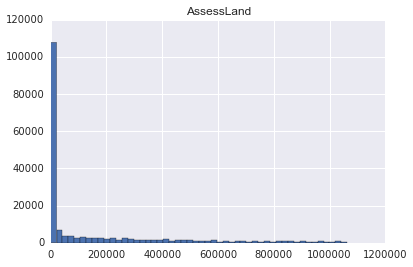

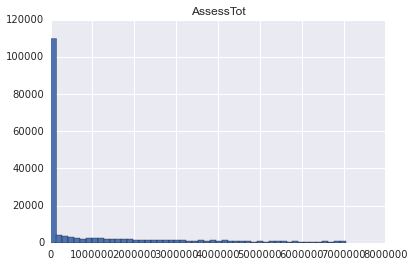

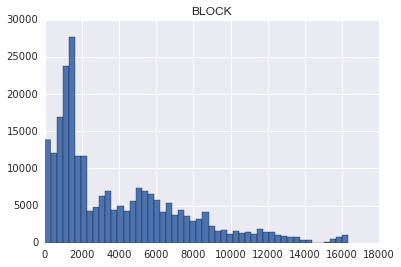

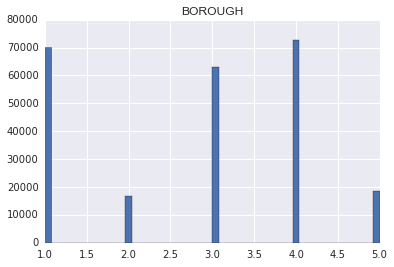

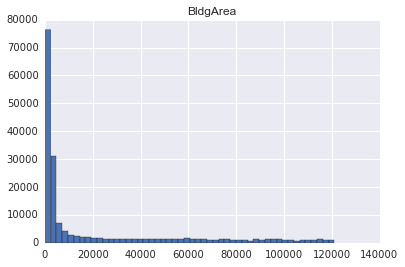

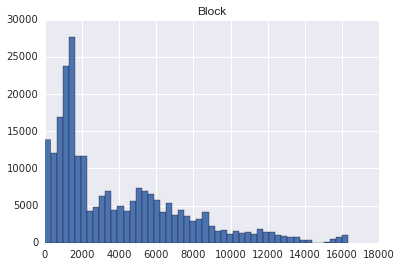

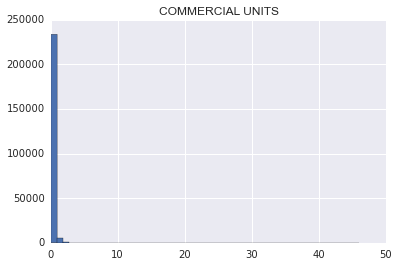

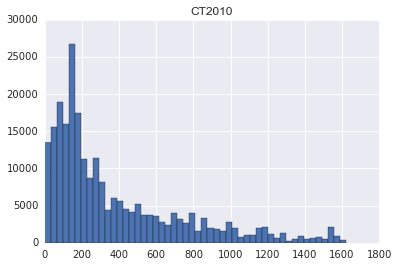

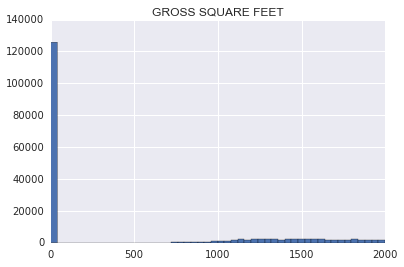

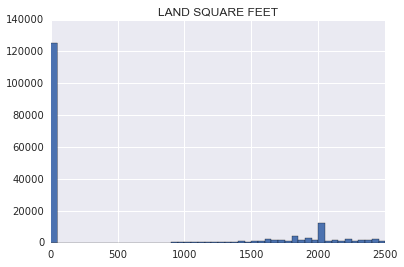

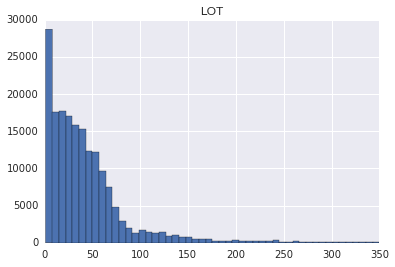

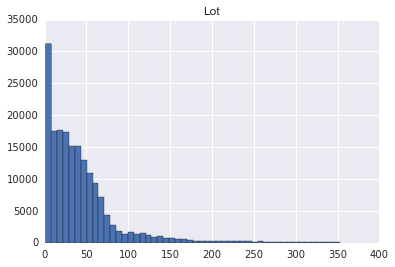

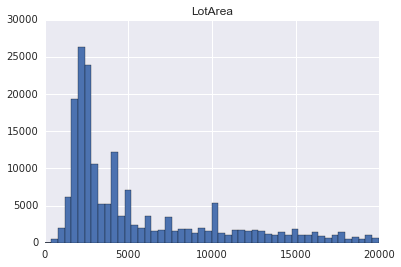

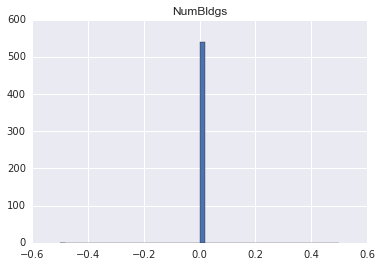

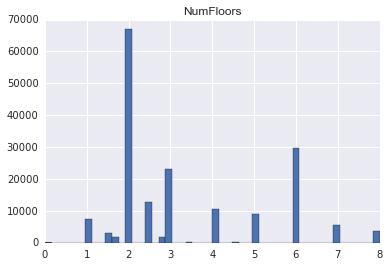

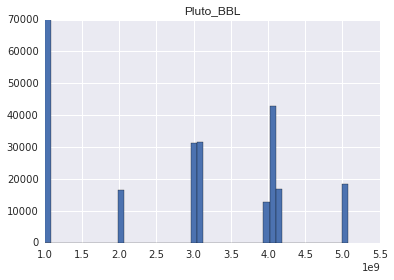

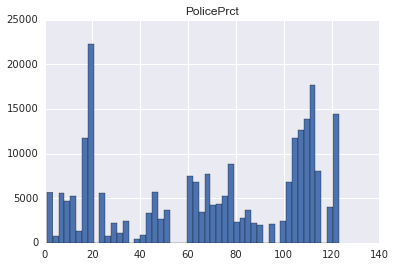

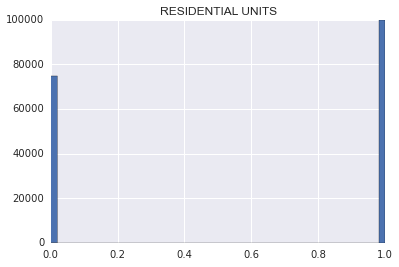

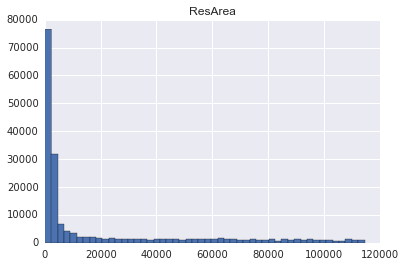

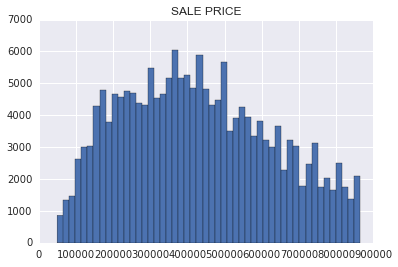

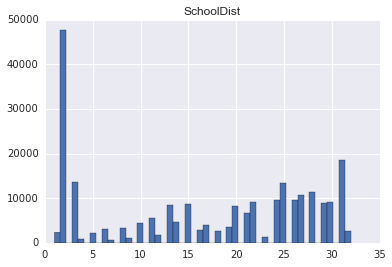

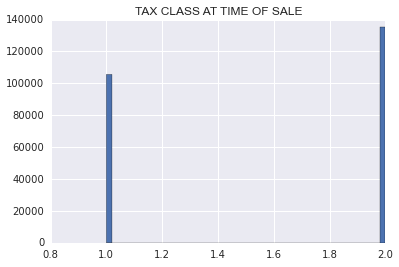

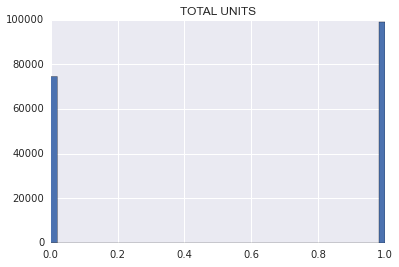

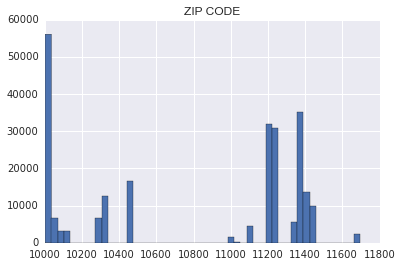

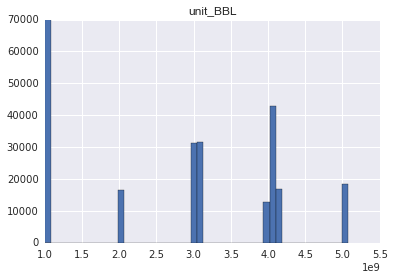

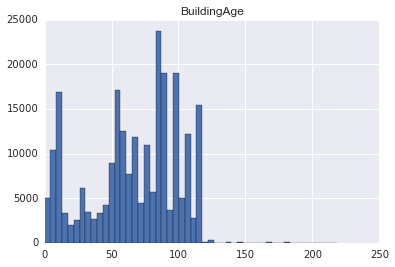

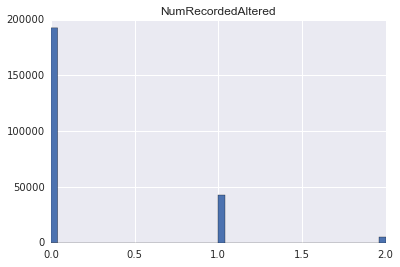

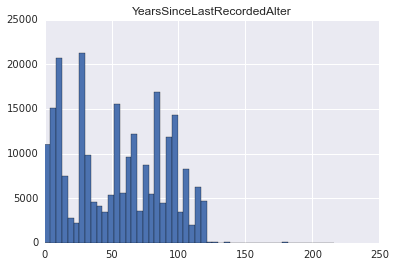

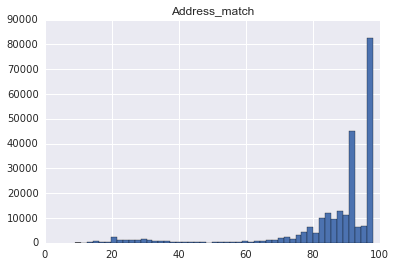

In [378]:
for column in summ.columns:
    if summ.loc['75%',column] > 0: #handle commercial units
        diff = summ.loc['max',column] / summ.loc['75%',column]
    else:
        diff = 1
    if diff > 10:
        plt.hist(df.loc[df[column] < summ.loc['75%',column],column].values,bins=50)
    else:
        plt.hist(df[column],bins=50)
    plt.title(column)
    plt.show()

In [359]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

fuzz.ratio(df.loc[0,'ADDRESS'], df.loc[0,'Address'])

63

In [360]:
df.loc[0,'ADDRESS']

'350 BEACH 40TH STREET                    '

In [361]:
df.loc[0,'Address']

'350 BEACH 40 STREET'

In [362]:
df['ADDRESS'] = df['ADDRESS'].str.replace(r'\s+',' ').str.lower()

In [363]:
df['Address'] = df['Address'].str.replace(r'\s+',' ').str.lower()

In [364]:
fuzz.ratio(df.loc[0,'ADDRESS'], df.loc[0,'Address'])

93

In [365]:
df.loc[0,'ADDRESS']

'350 beach 40th street '

In [366]:
df.loc[0,'Address']

'350 beach 40 street'

In [367]:
df['Address_match'] = df.apply(lambda row: fuzz.ratio(row['ADDRESS'], row['Address']), axis=1)

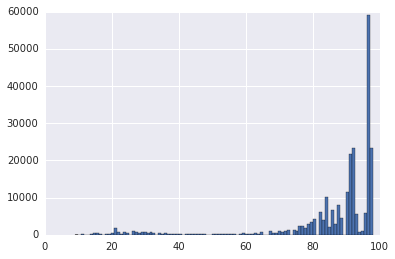

In [369]:
plt.hist(df['Address_match'], bins=100)
plt.show()

In [391]:
sample = np.random.choice(df.index, 25)

In [398]:
df.loc[70<df['Address_match'], ['Address_match','ADDRESS','Address']].sort_values('Address_match')

,Address_match,ADDRESS,Address
29953,71,"661 41 street, 3l",637 41 street
128195,71,"13 west 13th street, 7as",18 west 14 street
128194,71,"13 west 13th street, 3as",18 west 14 street
128193,71,"13 west 13th street, 7ds",18 west 14 street
128192,71,"13 west 13th street, 6cs",18 west 14 street
128190,71,"25 west 13th street, 2ln",22 west 14 street
218464,71,315 seventh avenue,315 7 avenue
128188,71,"25 west 13th street, 1hn",22 west 14 street
218465,71,315 seventh avenue,315 7 avenue
177504,71,"180 cabrini blvd, 49",120 cabrini boulevard


In [396]:
def address_to_list(address):
    return filter(None, str(address).strip().split(' '))

def is_int(s):
    try:
        int(s)
        return True
    except ValueError:
        return False
    
def street_num_and_name(address):
    address_list = address_to_list(address)
    if len(address_list)==0:
        return np.nan
    else: #Some info in address field
        if is_int(address_list[0].split('-')[0]): #note need to split on '-' for queens addresses
            street_name = ' '.join(address_list[1:])
            street_name_list = street_name.split(',')
            if len(street_name_list) == 1:
                unit_nums = np.nan
            elif len(street_name_list) >= 2:
                street_name = street_name_list[0]
                unit_nums = street_name_list[1:]
            else:
                print address
                raise ValueError
            return address_list[0], street_name, unit_nums
        else:
            return np.nan, ' '.join(address_list), np.nan
        
def split_df_address(df, colname):
    features = ['Street number','Street name', 'Unit number']
    if colname.isupper():
        features = [x.upper() for x in features]
    df[colname] = df[colname].apply(street_num_and_name)
    df[features] = df[colname].apply(pd.Series)